In [31]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [32]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\Ali\Machine Learning\Logistic Regression


In [33]:
cancer = pd.read_csv(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/KNN.csv')

In [34]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [35]:
del cancer['id']

In [36]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [37]:
import seaborn as sns

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

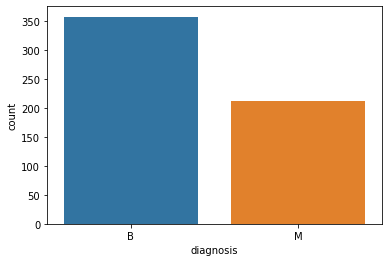

In [38]:
sns.countplot(cancer['diagnosis'])

In [39]:
#Sampling
X = cancer.iloc[:,1:]
print(X.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.05955  ...         13.50          15.64            86.97

In [40]:
y = cancer.iloc[:,:1]
print(y.head())

  diagnosis
0         B
1         B
2         B
3         B
4         B


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 1)
(114, 30)
(114, 1)


In [13]:
#Training
#model = LogisticRegression()
#model = neighbors.KNeighborsClassifier()
model = DecisionTreeClassifier(criterion='entropy',max_depth= 8)
#model = SVC(kernel='linear',  gamma = 10, C= 1)


model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [14]:
#Testing
predicted = model.predict(X_test)
print(predicted)
print(len(predicted))

['B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M'
 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M']
114


In [15]:
y_test.diagnosis.value_counts()

B    69
M    45
Name: diagnosis, dtype: int64

In [16]:
#Evaluation
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))

[[68  1]
 [ 3 42]]


In [17]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        69
           M       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [18]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X_train,\
     y = y_train, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))
print(accuracies)

Accuracy Mean 0.9296135265700484 Accuracy Variance      0.03888756861562969
[0.97826087 0.91304348 0.95652174 0.97826087 0.84782609 0.91111111
 0.93333333 0.95555556 0.93333333 0.88888889]


In [19]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9649122807017544

In [20]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[8, 10,12]}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [8, 10, 12]})

In [21]:
predicted = clf.predict(X_test)
predicted

array(['B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.9649122807017544

In [27]:
for i in [X_train , X_test]:
    print(i)
#print("-------------------------------------------------------------------",i)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
454       11.890         21.17           76.39      433.8          0.09773   
329       23.510         24.27          155.10     1747.0          0.10690   
441       13.620         23.23           87.19      573.2          0.09246   
408       14.870         16.67           98.64      682.5          0.11620   
464       17.140         16.40          116.00      912.7          0.11860   
..           ...           ...             ...        ...              ...   
371        9.173         13.86           59.20      260.9          0.07721   
9         11.060         14.96           71.49      373.9          0.10330   
478       14.960         19.10           97.03      687.3          0.08992   
179       12.180         20.52           77.22      458.7          0.08013   
117       15.490         19.97          102.40      744.7          0.11600   

     compactness_mean  concavity_mean  points_mean  symmetry_me

In [47]:
data = X_train.groupby(['dimension_mean', 'radius_worst'])['texture_worst'].count()
data

dimension_mean  radius_worst
0.04996         19.960          1
0.05024         23.240          1
0.05044         22.320          1
0.05054         30.750          1
0.05176         22.030          1
                               ..
0.08743         10.060          1
0.08980         9.733           1
0.09296         11.020          1
0.09502         10.280          1
0.09575         10.600          1
Name: texture_worst, Length: 455, dtype: int64

In [43]:
for i in [X_train , X_test]:
    print(i['dimension_mean'])

451    0.06937
120    0.05890
8      0.06481
64     0.07032
36     0.05461
        ...   
343    0.07669
401    0.05823
124    0.06372
369    0.05647
130    0.06898
Name: dimension_mean, Length: 455, dtype: float64
361    0.05338
536    0.05907
62     0.05866
400    0.06891
360    0.05177
        ...   
148    0.05561
259    0.05766
428    0.06331
33     0.05597
54     0.06229
Name: dimension_mean, Length: 114, dtype: float64


In [48]:
pd.isnull(X_train['dimension_mean'])

451    False
120    False
8      False
64     False
36     False
       ...  
343    False
401    False
124    False
369    False
130    False
Name: dimension_mean, Length: 455, dtype: bool